# FACET-II Particle Transverse Wake Instability Stages Tests

For benchmarking the model against QuickPIC simulations of FACET-II parameters.

Ben Chen, 7 October 2023, University of Oslo

## Import ABEL framework and required classes

In [1]:
import sys
sys.path.append('../')
from abel import *
import numpy as np

from scipy.constants import c, e, m_e, epsilon_0 as eps0
from abel.utilities.relativity import gamma2energy

# Enable the widget backend for interactive plots
#%matplotlib widget

# Sets the seed for the pseudo-random number generator in Python to obtain the same sequence of random numbers.
np.random.seed(42) 

## Settings and definitions

In [2]:
# Determines whether the results of the tracking should be overwritten.
overwrite = True

# Determines whether to use interstages in the tracking. Currently also need to comment out some lines in interstage_basic.py.
use_interstages = False

# Determines whether to save plots
save_plots = True

# Determines the DPI value the figures are saved to
save_fig_dpi = 600

# Number of stages in the linac.
num_stages = 3

# Set the default DPI
plt.rcParams['figure.dpi'] = 100

# Set default font sizes for figures
import matplotlib.pylab as pylab
params = {
    'axes.titlesize': 14,
    'axes.labelsize': 12.5,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 10
}
pylab.rcParams.update(params)

# Set the figure size to fit within the notebook cell
#plt.rcParams['figure.figsize'] = [.1, .1]  # Adjust these values as needed

# Set various paths
notebook_name = 'FACETII_prtcl_instability_stage_tests'
#upload_dir = '/scratch/project_465000445/jianbinb/uploaded/'
upload_dir = '/Users/ben_c/Library/CloudStorage/OneDrive-UniversitetetiOslo/OPAL/uploaded/'  # Path for local machine.

## Define the input beams
Same parameters as in /QUICKPIC/2019-03-20_FACET-II_parameters_longSim_gamma195690

In [3]:
# Define drive beam
driver = SourceBasic()
driver.charge = -e * 1.0e10  # [C]
driver_gamma = 195690.0
driver.energy = gamma2energy(driver_gamma)  # [eV]
driver.rel_energy_spread = 0.01*0
driver.bunch_length = 12.77e-6  # [m]
driver.z_offset = 60.0664e-6  # [m]
driver.emit_nx, driver.emit_ny = 5.0e-5, 5.0e-5  # [m rad]
driver_sigma_x = 2.05e-6  # [m]
driver_sigma_y = 2.05e-6  # [m]
driver.beta_x = driver_sigma_x**2/driver.emit_nx*driver_gamma  # [m]
driver.beta_y = driver_sigma_y**2/driver.emit_ny*driver_gamma  # [m]
driver.num_particles = 10000
#driver.wallplug_efficiency = 0.5


# Define main beam
main = SourceBasic()
main.charge = -e * 3.33e9  # [C]
main_gamma = 195690.0
main.energy = gamma2energy(main_gamma)  # [eV]
main.rel_energy_spread = 0.00005
main.bunch_length = 6.38e-06  # [m]
main.emit_nx, main.emit_ny = 5.0e-5, 5.0e-5  # [m rad]
main_sigma_x = 2.05e-6  # [m]
main_sigma_y = 2.05e-6  # [m]
main.beta_x = main_sigma_x**2/main.emit_nx*main_gamma  # [m]
main.beta_y = main_sigma_y**2/main.emit_ny*main_gamma  # [m]
#main.beta_x = stage.matched_beta_function(main.energy)
main.num_particles = 6000
main.z_offset = -49.7777e-6  # [m]
main.x_offset =  3.649e-06  # [m]
main.y_offset =  0.5*main_sigma_y  # [m]
main.symmetrize = False
#main.wallplug_efficiency = 0.1
#main.accel_gradient = 7.11e9  # [V/m]

## Define the linac

In [4]:
############# Define the first stage #############
stage = StagePrtclTransWakeInstability()
stage.length = 3.2970791325217528/num_stages  # [m]
#stage.length = 3.3*1.0001/num_stages  # [m]
stage.time_step_mod = 0.02
stage.nom_energy_gain = 23.5e9/num_stages  # [eV]
stage.plasma_density = 4e22  # [m^-3]
stage.driver_source = driver
stage.main_source = main
drive_beam = stage.driver_source.track()  # Convert a Source object to a Beam object.
stage.drive_beam = drive_beam
#stage.main_beam = main_beam
stage.enable_rr = False
#stage.diag_path = current_dir + path_sep + 'run_data' + path_sep + notebook_name + path_sep

# ========== Beam slice parameters ==========
#main_beam_roi = np.max(np.abs(main_beam.zs()))/main_beam.bunch_length()*1.5  # Specifies the region of interest in units of main beam sigma_z (rms bunch length).
#stage.main_beam_roi = main_beam_roi
#cut_off = stage.main_beam_roi*main.bunch_length
#stage.beam_length_roi = 2*cut_off  # [m] total bunch/beam length.  old name: tot_beam_length

# Freedman–Diaconis rule for determining the beam slice thickness
#num_beam_slice = stage.FD_rule_num_slice()
#stage.num_beam_slice = num_beam_slice

# Number profile N(z). Dimensionless, same as dN/dz with each bin multiplied with the width of the slices.
#main_num_profile, z0s_main_cut = stage.longitudinal_number_distribution(beam=stage.main_beam, make_plot=True)  # uniform_bins=False allows for thicker slices towards beam head.
#stage.main_num_profile = main_num_profile
#stage.z_slices = z0s_main_cut
#num_beam_slice = len(z0s_main_cut)
#stage.num_beam_slice = num_beam_slice

#driver_num_profile, zs_driver_cut = stage.longitudinal_number_distribution(beam=stage.drive_beam)
#stage.driver_num_profile = driver_num_profile
#stage.zs_driver_cut = zs_driver_cut

# Initial main beam slice x-offsets, energies and x'-offsets
#stage.x_slices_main = stage.particles2slices(beam=stage.main_beam, beam_quant=stage.main_beam.xs(), z_slices=stage.z_slices, make_plot=False)
#stage.xp_slices_main = stage.particles2slices(beam=stage.main_beam, beam_quant=stage.main_beam.xps(), z_slices=stage.z_slices, make_plot=False)
#stage.y_slices_main = stage.particles2slices(beam=stage.main_beam, beam_quant=stage.main_beam.ys(), z_slices=stage.z_slices, make_plot=False)
#stage.yp_slices_main = stage.particles2slices(beam=stage.main_beam, beam_quant=stage.main_beam.yps(), z_slices=stage.z_slices, make_plot=False)
#stage.energy_slices_main = stage.particles2slices(beam=stage.main_beam, beam_quant=stage.main_beam.Es(), z_slices=stage.z_slices, make_plot=False)

#s_init = stage.z_slices
#x0s_main = stage.main_beam.xs()


############# Define interstages #############
if use_interstages is True:
    interstage = InterstageBasic()
    interstage.beta0 = lambda energy: stage.get_matched_beta_function(energy)
    interstage.dipole_length = lambda energy: 1 * np.sqrt(energy/10e9)  # [m(eV)], energy-dependent length
    interstage.dipole_field = 0.5 # [T]  (0-2)T
else:
    interstage = InterstageNull()
stage.interstage_dipole_field = interstage.dipole_field


############# Define linac #############
linac = Linac(source=main, stage=stage, interstage=interstage, num_stages=num_stages)

## Calculate input longitudinal field, plasma bubble radius and longitudinal number profile with Wake-T

In [5]:
main_beam = stage.main_source.track()  # Convert a Source object to a Beam object.

# Define a Wake-T stage
stage_wakeT = StageWakeT()
stage_wakeT.driver_source = driver
k_beta = k_p(stage.plasma_density)/np.sqrt(2*min(main_beam.gamma(),drive_beam.gamma()/2))
lambda_betatron = (2*np.pi/k_beta)
stage_wakeT.length = lambda_betatron/10  # [m]
stage_wakeT.plasma_density = stage.plasma_density  # [m^-3]
#stage_wakeT.keep_data = True

# Run the Wake-T stage
beam_copy = copy.deepcopy(main_beam)
beam_wakeT = stage_wakeT.track(beam_copy)

Plasma stage: 100%|█████████████████████████████████████████| 0.007385/0.007385 m [00:00]


/Users/ben_c/Library/CloudStorage/OneDrive-UniversitetetiOslo/Software/opal_env/lib/python3.10/site-packages/aptools/data_analysis/beam_diagnostics.py:524: RuntimeWarning: invalid value encountered in sqrt
  em_x = np.sqrt(np.linalg.det(cov_x.astype(np.float32, copy=False)))


### Extract data

In [6]:
# Extract initial beam densities
beams_dens = stage_wakeT.initial.beam.density.rho
beams_extent = stage_wakeT.initial.beam.density.extent

# Extract transverse fields
Ex = stage_wakeT.initial.plasma.wakefield.Exs
By = stage_wakeT.initial.plasma.wakefield.Bys
info_Ex = stage_wakeT.initial.plasma.wakefield.Exs_metadata
Ex_cBy = Ex - c*By
zs_Ex = info_Ex.z
rs_Ex = info_Ex.r

# Extract longitudinal E-field
Ez_wakeT = stage_wakeT.initial.plasma.wakefield.Ezs
info_Ez = stage_wakeT.initial.plasma.wakefield.Ezs_metadata
zs_Ez_wakeT = info_Ez.z
rs_Ez = info_Ez.r

# Extract axial longitudinal E-field
Ez_axis_wakeT = stage_wakeT.initial.plasma.wakefield.onaxis.Ezs
zs_Ez_wakeT = stage_wakeT.initial.plasma.wakefield.onaxis.zs

# Extract plasma charge density
rho = stage_wakeT.initial.plasma.density.rho
info_rho = stage_wakeT.initial.plasma.density.metadata

# Calculate the number density
plasma_num_density = rho/stage_wakeT.plasma_density
# Extract coordinates
zs_rho = info_rho.z
rs_rho = info_rho.r

# Extract the plasma bubble radius
bubble_radius_wakeT = stage.get_bubble_radius(plasma_num_density, rs_rho, main_offset=main_beam.x_offset(), threshold=0.8)

# Extract number density profiles for drive and main beam
zs_dNdz = stage_wakeT.initial.beam.current.zs
dNdz = stage_wakeT.initial.beam.current.Is/-e/c

### Make plots

Text(0, 0.5, '$\\partial N/\\partial z$ [$\\mathrm{m}^{-1}$]')

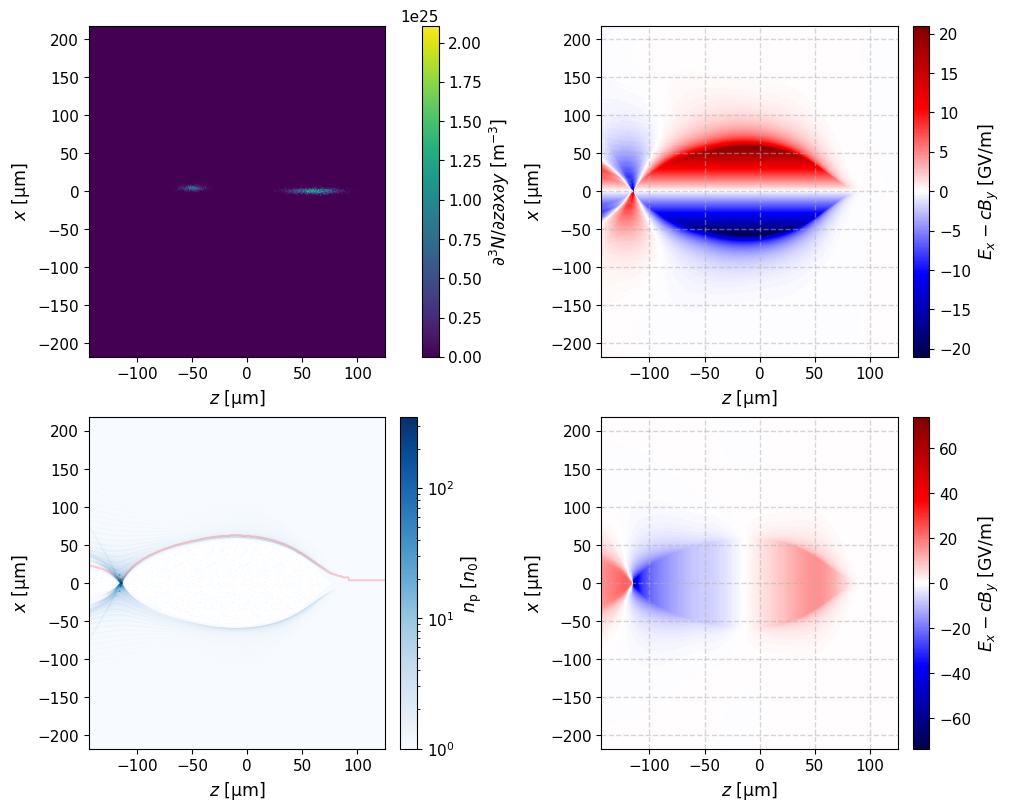

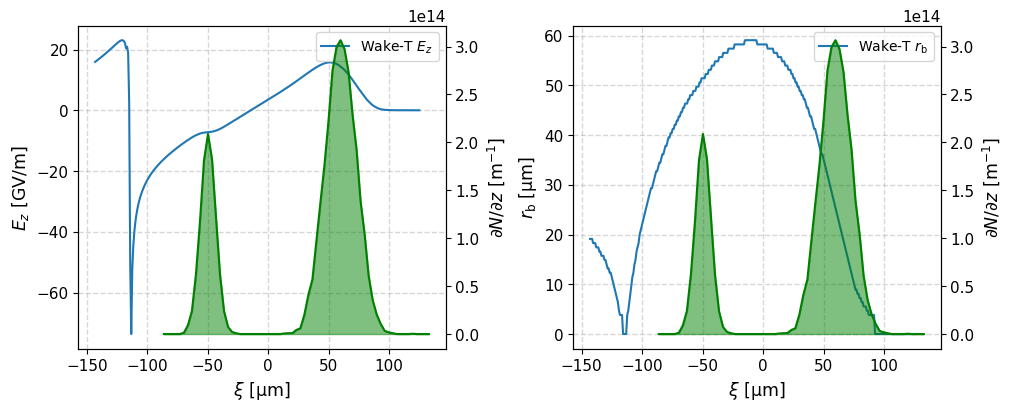

In [7]:
# Labels for plots
zlab = '$z$ [$\mathrm{\mu}$m]'
xilab = r'$\xi$ [$\mathrm{\mu}$m]'
xlab = '$x$ [$\mathrm{\mu}$m]'
field_lab = '$E_z$ [GV/m]'
dN_dz_lab = '$\partial N/\partial z$ [$\mathrm{m}^{-1}$]'

# Set up a figure with axes
fig_wakeT, axs_wakeT = plt.subplots(nrows=2, ncols=2, layout="constrained", figsize=(10, 4*2))

# Plot the bunches
stage.imshow_plot(beams_dens, axes=axs_wakeT[0][0], extent=beams_extent*1e6, colmap='viridis', xlab=zlab, ylab=xlab, clab='$\partial^3 N/\partial z\partial x\partial y$ [$\mathrm{m}^{-3}$]', gridOn=False, origin='lower', log_cax=False)

# Plot the transverse fields
Ex_extent = stage_wakeT.initial.plasma.wakefield.Exs_metadata.imshow_extent*1e6
stage.imshow_plot(Ex_cBy/1e9, axes=axs_wakeT[0][1], extent=Ex_extent, vmin=Ex_cBy.min()/1e9, vmax=-Ex_cBy.min()/1e9, colmap='seismic', xlab=zlab, ylab=xlab, clab='$E_x-cB_y$ [GV/m]', gridOn=True, origin='lower')

# Plot the plasma number density
rho_extent = stage_wakeT.initial.plasma.density.extent*1e6
stage.imshow_plot(plasma_num_density, axes=axs_wakeT[1][0], extent=rho_extent, colmap='Blues', xlab=zlab, ylab=xlab, clab='$n_\mathrm{p}$ [$n_0$]', gridOn=False, origin='lower', log_cax=True)
axs_wakeT[1][0].plot(zs_rho*1e6, (bubble_radius_wakeT+main.x_offset)*1e6, 'r', alpha=0.2)

# Plot the longitudinal electric field
Ez_extent = stage_wakeT.initial.plasma.wakefield.Ezs_metadata.imshow_extent*1e6
stage.imshow_plot(Ez_wakeT/1e9, axes=axs_wakeT[1][1], extent=Ez_extent, vmin=Ez_wakeT.min()/1e9, vmax=-Ez_wakeT.min()/1e9, colmap='seismic', xlab=zlab, ylab=xlab, clab='$E_x-cB_y$ [GV/m]', gridOn=True, origin='lower')

# Set up a figure with axes
fig_wakeT2, axs_wakeT2 = plt.subplots(nrows=1, ncols=2, layout="compressed", figsize=(10, 4))
#fig_wakeT2.suptitle('$t=$' f'{format(dump_time, ".2e")}' ' s')

# Plot longitudinal axial E-field
axs_wakeT2[0].plot(zs_Ez_wakeT*1e6, Ez_axis_wakeT/1e9, label='Wake-T $E_z$')
axs_wakeT2[0].legend()
axs_wakeT2[0].grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=.5)
axs_wakeT2[0].set_xlabel(xilab)
axs_wakeT2[0].set_ylabel(field_lab)
ax = axs_wakeT2[0].twinx()
ax.fill_between(x=zs_dNdz*1e6, y1=dNdz , y2=0, color='g', alpha=0.5)
ax.plot(zs_dNdz*1e6, dNdz, 'g')
ax.set_ylabel(dN_dz_lab)

# Plot the plasma bubble radius
axs_wakeT2[1].plot((zs_rho)*1e6, bubble_radius_wakeT*1e6, label='Wake-T $r_\mathrm{b}$')
axs_wakeT2[1].legend()
axs_wakeT2[1].grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=.5)
axs_wakeT2[1].set_xlabel(xilab)
axs_wakeT2[1].set_ylabel('$r_\mathrm{b}$ [$\mathrm{\mu}$m]')
ax = axs_wakeT2[1].twinx()
ax.fill_between(x=zs_dNdz*1e6, y1=dNdz , y2=0, color='g', alpha=0.5)
ax.plot(zs_dNdz*1e6, dNdz, 'g')
ax.set_ylabel(dN_dz_lab)


#stage_wakeT.plot_evolution()
#beam_wakeT.plot_lps()

In [8]:
#test = np.sum(beam_hist2d*np.diff(xedges), axis=0)
#print(np.sum(test*np.diff(zedges)))
#
#plt.figure()
#plt.plot(zedges[0:-1]*1e6, test)
#plt.plot(xi_dNdz_main_wakeT*1e6, dNdz_main_wakeT, 'g', alpha=0.5)
#plt.plot(xi_dNdz_driver_wakeT*1e6, dNdz_driver_wakeT, 'g', alpha=0.5)
#
#
## Plot some transverse slices of the plasma number density
#plt.figure()
#rows, cols = np.shape(plasma_num_density)
##plt.plot(plasma_num_density[round(rows/2), 3:-1])
#idx_plasma_slice = round(cols/2)
#plt.plot(plasma_num_density[:,idx_plasma_slice], label='$z=$' f'{format(zs_rho[idx_plasma_slice]*1e6, ".1f")}' ' $\mathrm{\mu}$m')
#plt.plot(plasma_num_density[:,idx_plasma_slice+50], label='$z=$' f'{format(zs_rho[idx_plasma_slice+50]*1e6, ".1f")}' ' $\mathrm{\mu}$m')
#plt.plot(plasma_num_density[:,idx_plasma_slice+75], label='$z=$' f'{format(zs_rho[idx_plasma_slice+75]*1e6, ".1f")}' ' $\mathrm{\mu}$m')
#plt.plot(plasma_num_density[:,idx_plasma_slice+100], label='$z=$' f'{format(zs_rho[idx_plasma_slice+100]*1e6, ".1f")}' ' $\mathrm{\mu}$m')
#plt.plot(plasma_num_density[:,idx_plasma_slice-50], label='$z=$' f'{format(zs_rho[idx_plasma_slice-50]*1e6, ".1f")}' ' $\mathrm{\mu}$m')
#plt.plot(plasma_num_density[:,idx_plasma_slice-75], label='$z=$' f'{format(zs_rho[idx_plasma_slice-75]*1e6, ".1f")}' ' $\mathrm{\mu}$m')
#plt.plot(plasma_num_density[:,idx_plasma_slice-100], label='$z=$' f'{format(zs_rho[idx_plasma_slice-100]*1e6, ".1f")}' ' $\mathrm{\mu}$m')
#plt.plot(plasma_num_density[:,idx_plasma_slice-120], label='$z=$' f'{format(zs_rho[idx_plasma_slice-120]*1e6, ".1f")}' ' $\mathrm{\mu}$m')
#
#plt.grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=.5)
#plt.xlabel('Index')
#plt.ylabel('$n_\mathrm{p}$ [$n_0$]')
#plt.title('$t=$' f'{format(dump_time, ".2e")}' ' s')
#plt.legend()

## Summary of initial beam

In [9]:
_, init_Ez_fit_obj = stage.Ez_shift_fit(Ez_axis_wakeT, zs_Ez_wakeT, main_beam)
stage.Ez_fit_obj = init_Ez_fit_obj
_, init_rb_fit_obj = stage.rb_shift_fit(bubble_radius_wakeT, zs_rho, main_beam)
stage.rb_fit_obj = init_rb_fit_obj

stage.print_initial_summary(drive_beam, main_beam)

Time step [betatron wavelength/c]:			 0.020
Interstages enabled:					 False
Interstage dipole field:				 0.000
Radiation reaction enabled:				 True
Symmetrised main beam:					 False
Symmetrised drive beam:					 False

Stage length [m]:					 1.099
Plasma density [m^-3]:					 4.000e+22
Ramp beta magnification:				 1.000
Drive beam x jitter (std) [um]:				 0.000
Drive beam y jitter (std) [um]:				 0.000
----------------------------------------------------------------------

-------------------------------------------------------------------------------------
Quantity 					 Drive beam 		 Main beam
-------------------------------------------------------------------------------------
Number of macroparticles:			 10000			 6000
Initial beam population:			 1.000e+10 		 3.330e+09

Beam centre gradient [GV/m]:				  		 -7.212
Initial mean gamma:				 195690.000 		 195690.077
Initial mean energy [GeV]:			 99.997 		 99.997
Initial rms energy spread [%]:			 0.000 			 0.005

Initial beam x offset [um]:

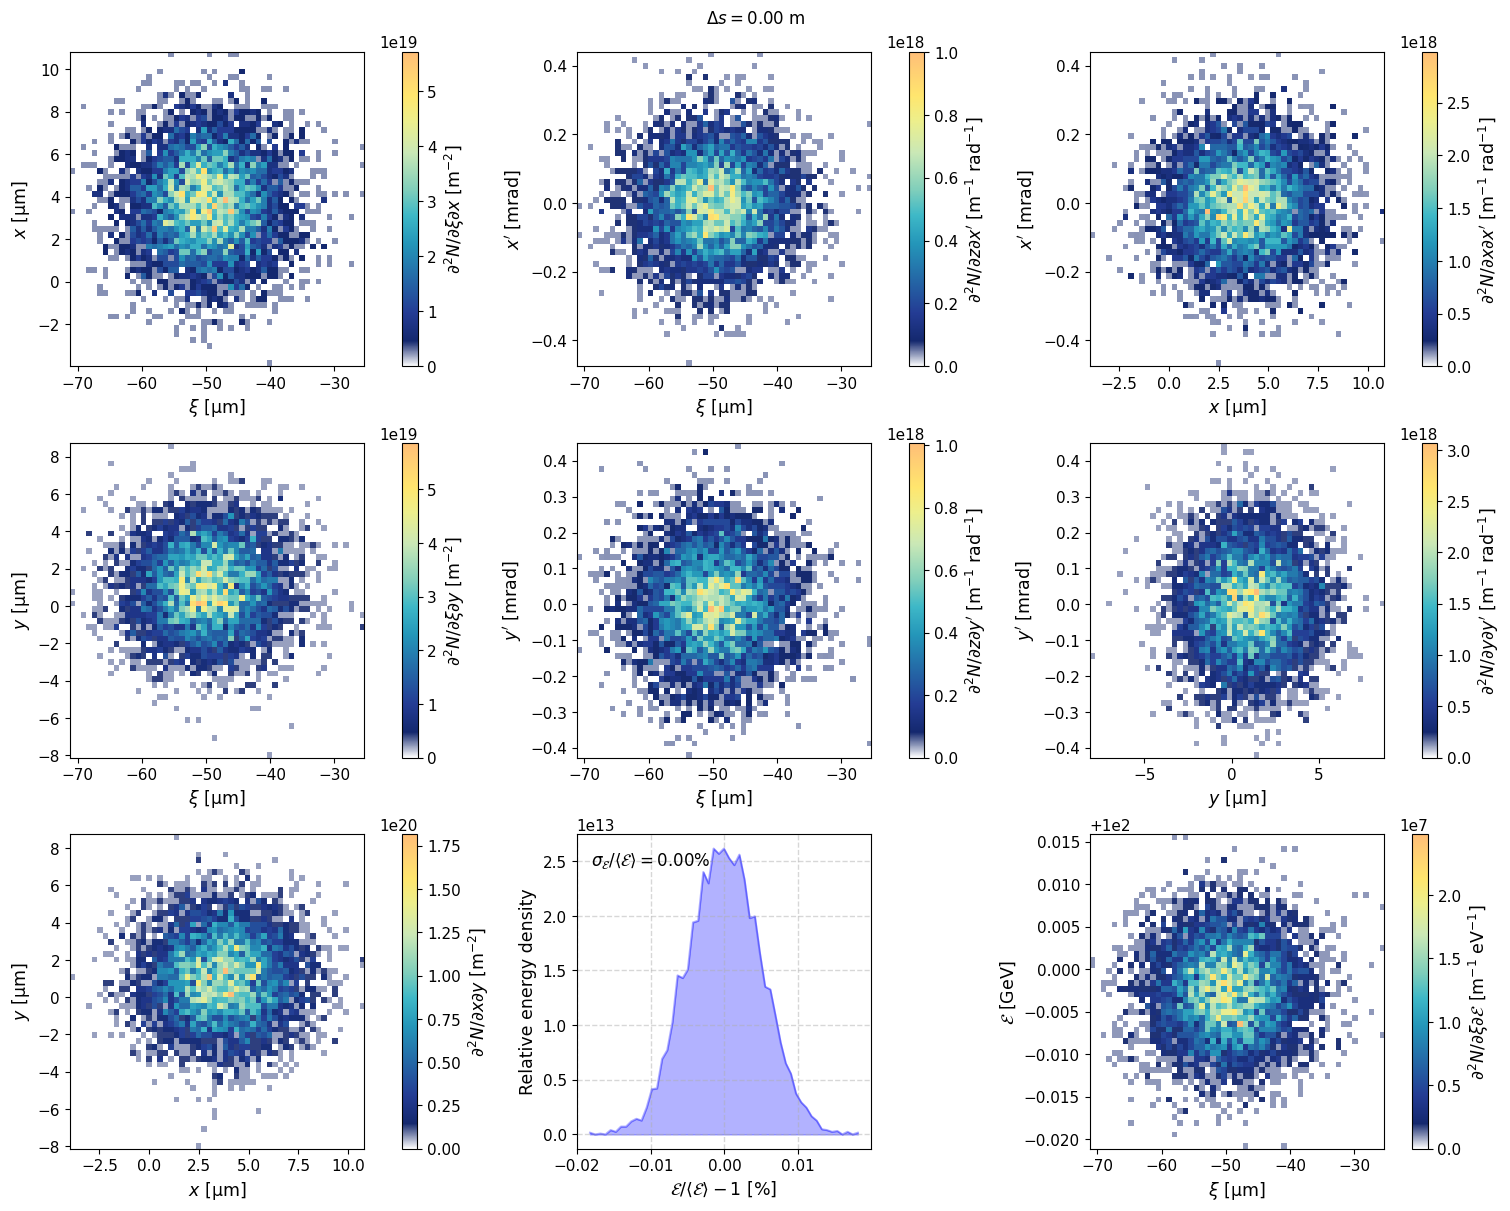

In [10]:
#stage.scatter_diags(beam=stage.main_beam, n_th_particle=1)
stage.density_map_diags(beam=main_beam)

## Perform tracking

In [11]:
linac.run(notebook_name, num_shots=1, overwrite=overwrite)

Tracking element 1 (SourceBasic, stage 0, s = 0.0 m, 100.0 GeV, -0.53 nC, 0.0% rms, 49.7/50.0 µm-rad)
Plasma stage: 100%|█████████████████████████████████████████| 0.007385/0.007385 m [00:00]


Instability tracking 100.16%: 100%|██████| 100.1637871291931/100 [00:09<00:00, 10.32it/s]


Tracking element 2 (StagePrtclTransWakeInstability, stage 1, s = 1.1 m, 107.6 GeV, -0.53 nC, 0.7% rms, 70.0/51.9 µm-rad)
Tracking element 3 (InterstageNull, stage 1, s = 1.1 m, 107.6 GeV, -0.53 nC, 0.7% rms, 70.0/51.9 µm-rad)
Plasma stage: 100%|█████████████████████████████████████████| 0.007385/0.007385 m [00:00]


Instability tracking 100.15%: 100%|█████| 100.15354770132794/100 [00:07<00:00, 13.83it/s]


Tracking element 4 (StagePrtclTransWakeInstability, stage 2, s = 2.2 m, 115.0 GeV, -0.53 nC, 1.2% rms, 146.7/59.3 µm-rad)
Tracking element 5 (InterstageNull, stage 2, s = 2.2 m, 115.0 GeV, -0.53 nC, 1.2% rms, 146.7/59.3 µm-rad)
Plasma stage: 100%|█████████████████████████████████████████| 0.007385/0.007385 m [00:00]


Instability tracking 100.1%: 100%|██████| 100.09830731755858/100 [00:06<00:00, 14.46it/s]


Tracking element 6 (StagePrtclTransWakeInstability, stage 3, s = 3.3 m, 122.2 GeV, -0.53 nC, 1.4% rms, 272.3/69.8 µm-rad)


In [12]:
shot_num = 0
stage_num = 2
stage_tracked = linac[shot_num].stages[stage_num]  # Get a specific acceleration stage in a linac. Zero indexing.
beam_out = linac[shot_num].get_beam(stage_num*2+1)  # Get the corresponding beam after the acceleration stage. Zero indexing.
#beam_out = linac[shot_num].get_beam(-2)

stage_tracked.print_current_summary(drive_beam, main_beam, beam_out)

Time step [betatron wavelength/c]:	 0.020
Interstages enabled:			 False
Interstage dipole field:		 0.000
Radiation reaction enabled:		 True
Symmetrised main beam:			 False
Symmetrised drive beam:			 False

Stage length [m]:			 1.099
Propagation length [m]:			 3.297
Plasma density [m^-3]:			 4.000e+22
Ramp beta magnification:		 1.000
Drive beam x jitter (std) [um]:		 0.000
Drive beam y jitter (std) [um]:		 0.000
---------------------------------------------------

-------------------------------------------------------------------------------------
Quantity 					 Drive beam 		 Main beam
-------------------------------------------------------------------------------------
Initial number of macroparticles:		 10000			 6000
Current number of macroparticles:		  			 6000
Initial beam population:			 1.000e+10 		 3.330e+09
Current beam population:			 	 		 3.330e+09

Beam centre gradient [GV/m]:				  		 -7.298
Current mean gamma:				 	 		 239166.313
Initial mean energy [GeV]:			 99.997 		 99.997

## Plot outputs

In [13]:
# Make plots folder
plot_path = stage_tracked.diag_path + 'plots' + os.sep
if not os.path.exists(plot_path):
    os.mkdir(plot_path)

### Cut-out bubble radius, longitudinal E-field and longitudinal beam profile

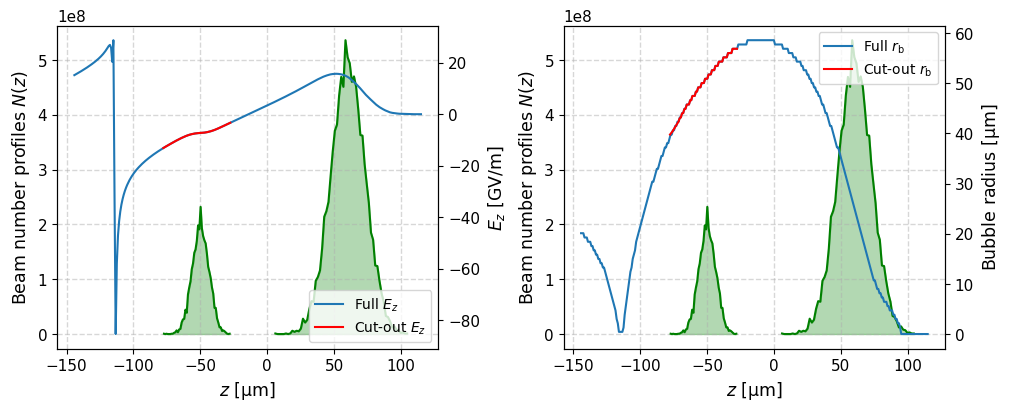

In [14]:
stage_tracked.plot_Ez_rb_cut()

# Save the figure
if save_plots is True:
    filename = plot_path + 'Ez_rb_' + 'shot' + str(shot_num) + '_prtclInstabilityStage' + str(stage_num)
    plt.savefig(filename+'.pdf', format='pdf', dpi=save_fig_dpi, bbox_inches='tight', transparent=False)
    plt.savefig(filename+'.png', format='png', dpi=save_fig_dpi, bbox_inches='tight', transparent=False)

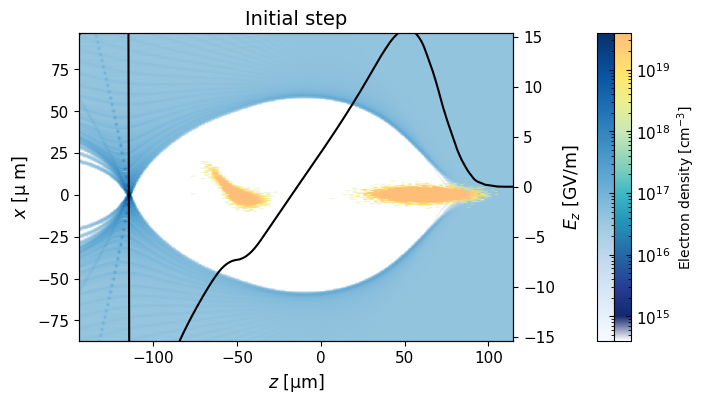

In [15]:
#stage_tracked.plot_wakefield()
stage_tracked.plot_wake()

### Beam particle plots

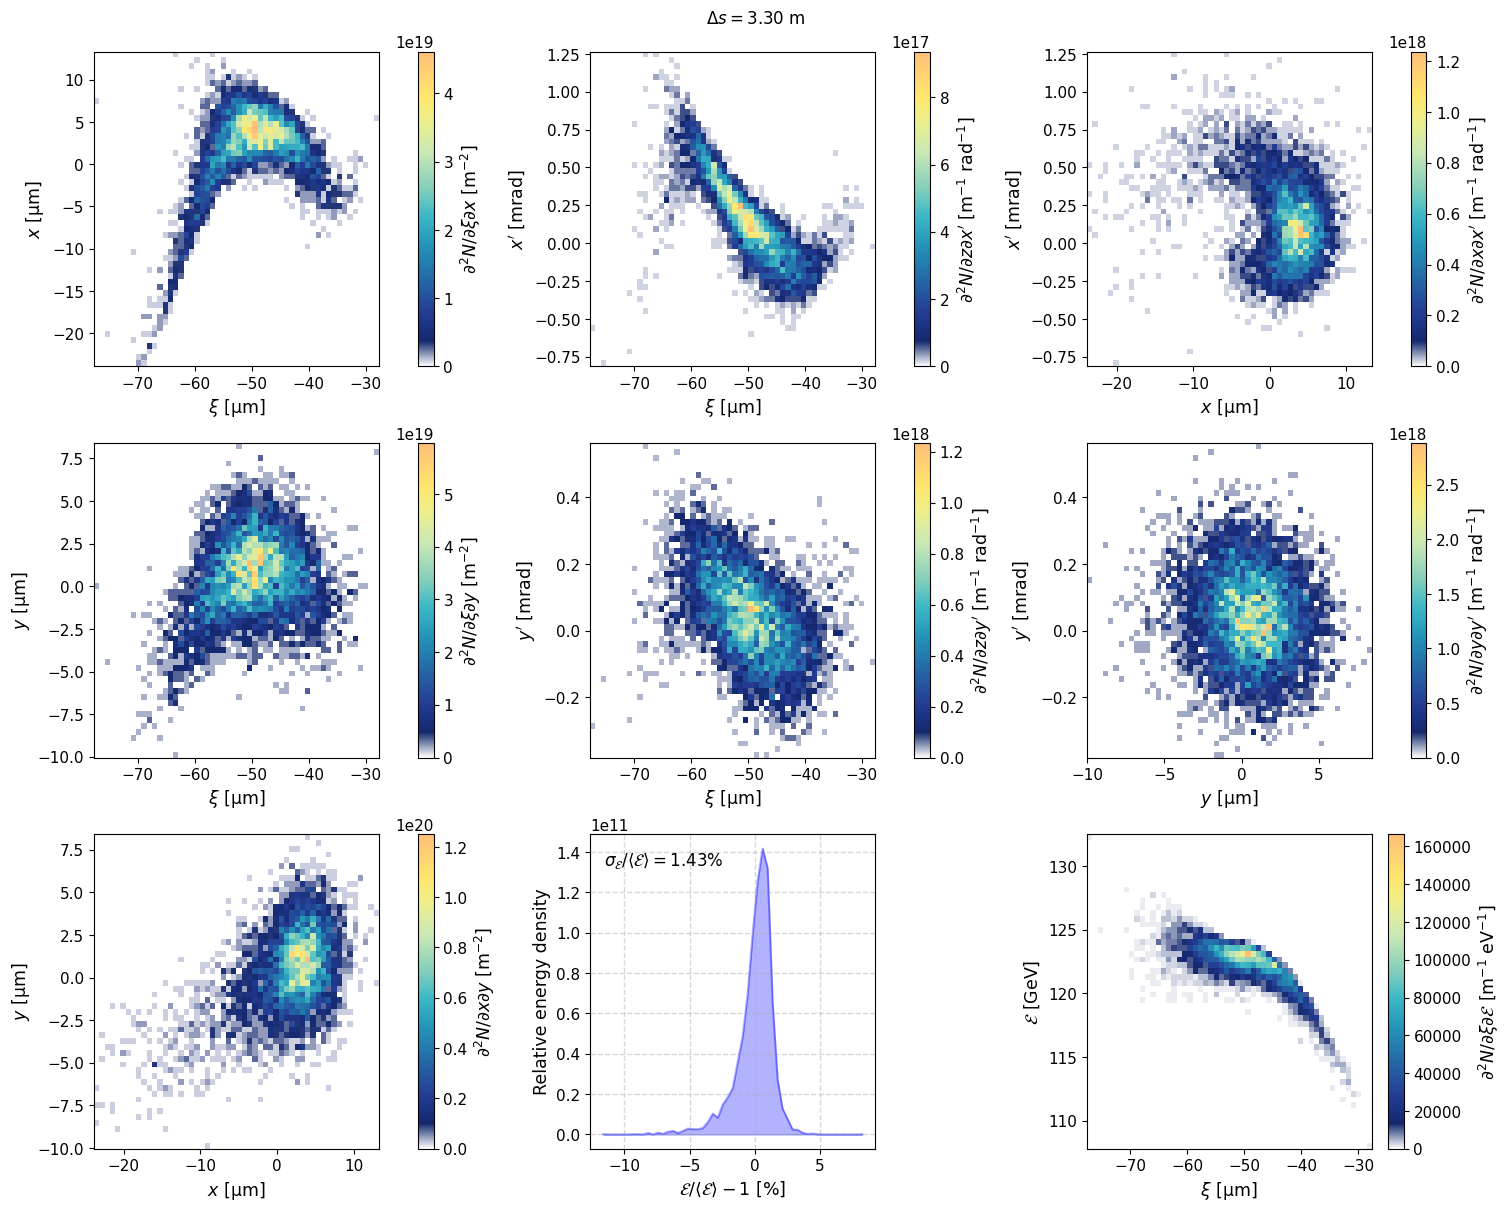

In [16]:
stage_tracked.density_map_diags(beam=beam_out)

# Save the figure
if save_plots is True and overwrite is True:
    filename = plot_path + 'densMaps_' + 'shot' + str(shot_num) + '_prtclInstabilityStage' + str(stage_num)
    plt.savefig(filename+'.pdf', format='pdf', dpi=save_fig_dpi, bbox_inches='tight', transparent=False)
    plt.savefig(filename+'.png', format='png', dpi=save_fig_dpi, bbox_inches='tight', transparent=False)

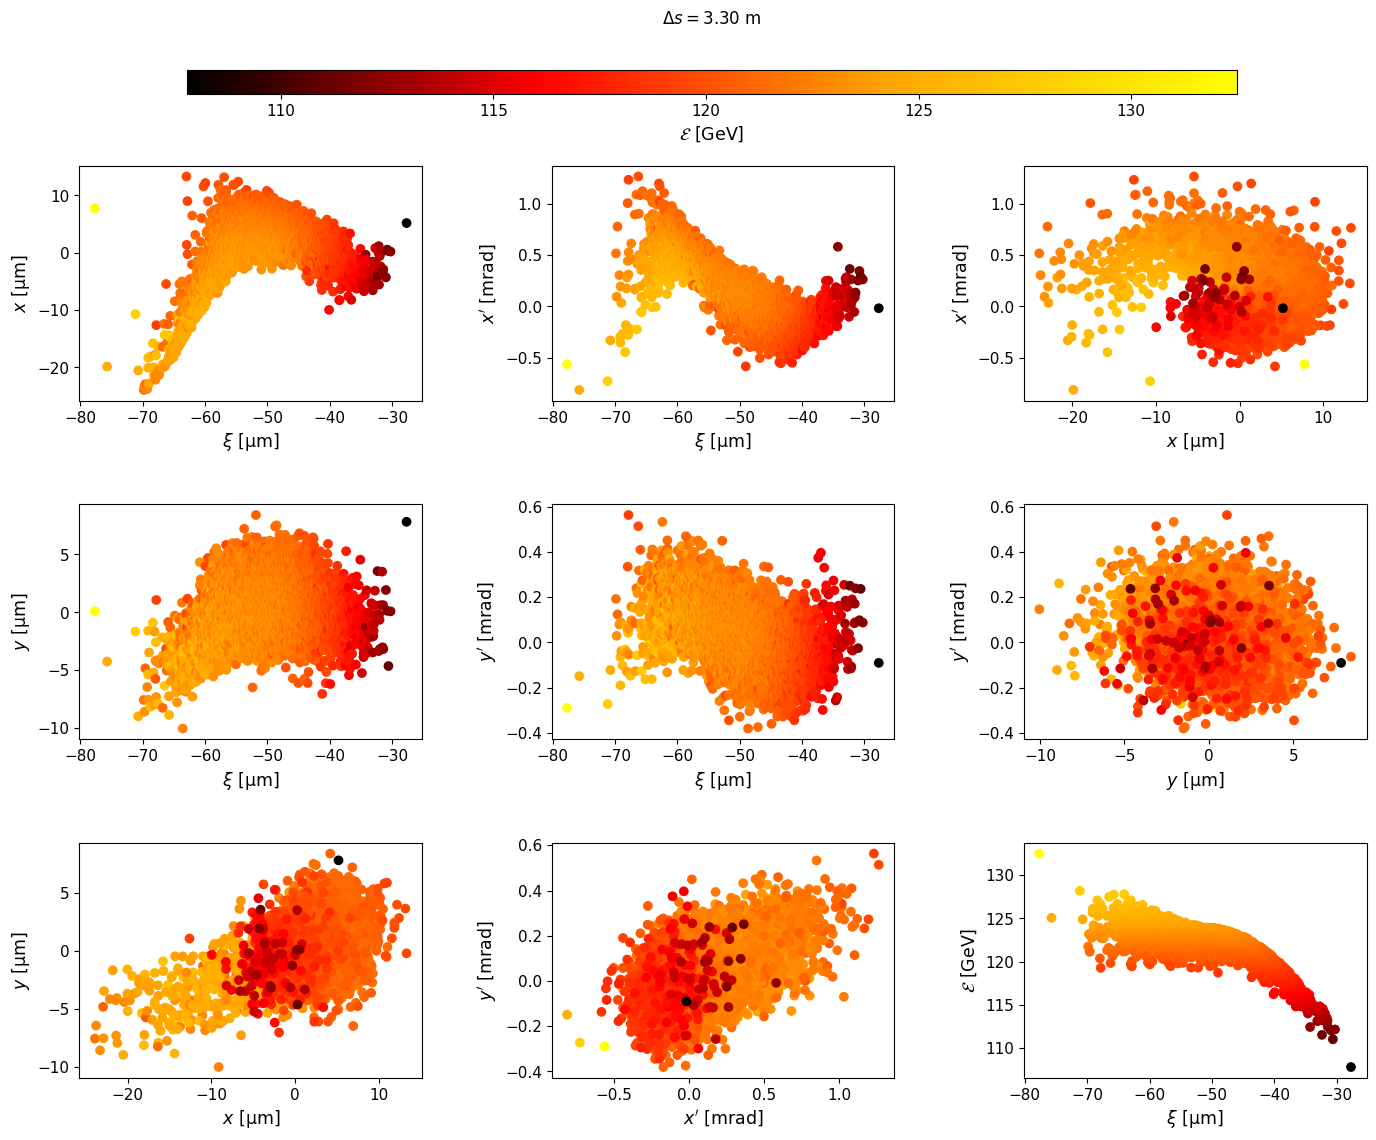

In [17]:
stage_tracked.scatter_diags(beam=beam_out, n_th_particle=1)

# Save the figure
if save_plots is True and overwrite is True:
    filename = plot_path + 'scatter_' + 'prtclInstabilityStage_' + 'shot' + str(shot_num) + '_prtclInstabilityStage' + str(stage_num)
    plt.savefig(filename, format='png', dpi=save_fig_dpi, bbox_inches='tight', transparent=False)

## Plot beam evolution and survey

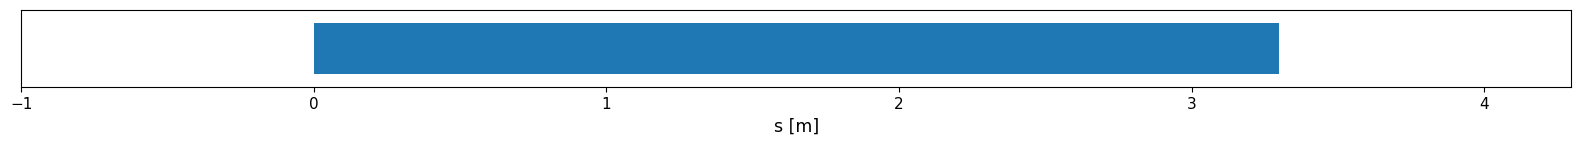

<Figure size 640x480 with 0 Axes>

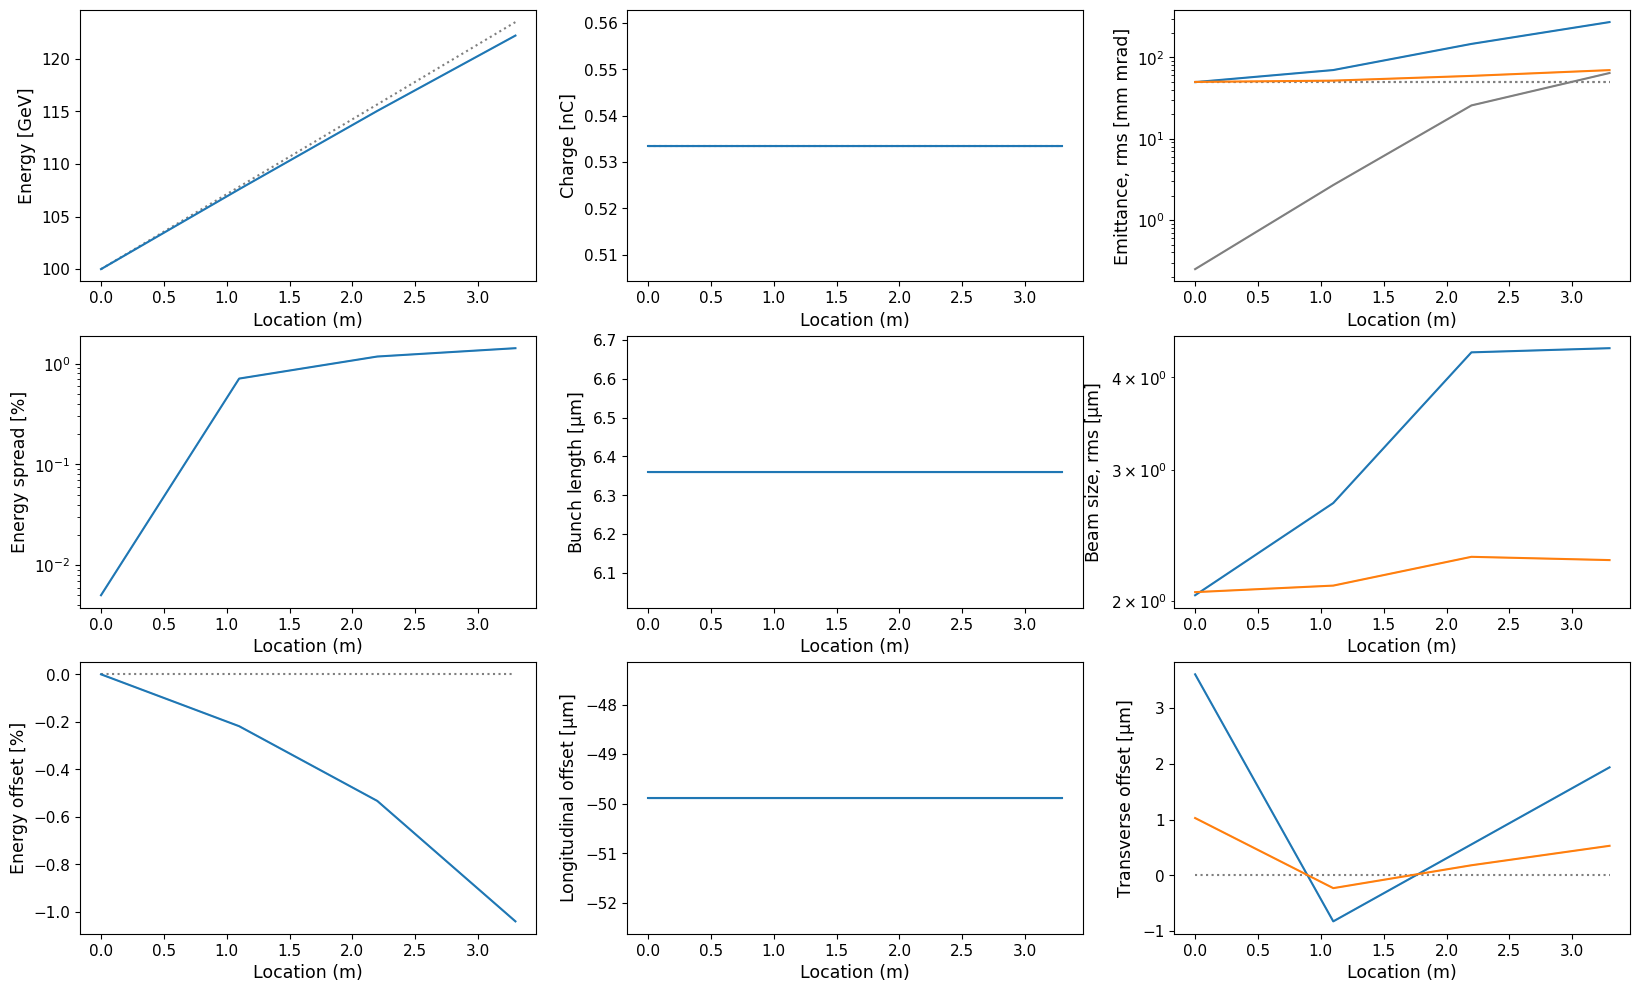

<Figure size 640x480 with 0 Axes>

In [18]:
# plot linac survey
linac.plot_survey()

# Save the figure
if save_plots is True and overwrite is True:
    filename = plot_path + 'sketch_evolution_' + 'shot' + str(shot_num) + '_prtclInstabilityStage' + str(stage_num)
    plt.savefig(filename+'.pdf', format='pdf', dpi=save_fig_dpi, bbox_inches='tight', transparent=False)


# plot beam evolution
linac.plot_evolution()

# Save the figure
if save_plots is True and overwrite is True:
    filename = plot_path + 'evolution_' + 'shot' + str(shot_num) + '_prtclInstabilityStage' + str(stage_num)
    plt.savefig(filename+'.pdf', format='pdf', dpi=save_fig_dpi, bbox_inches='tight', transparent=False)
    plt.savefig(filename+'.png', format='png', dpi=save_fig_dpi, bbox_inches='tight', transparent=False)

In [19]:
if overwrite is True:
    params = {
    'axes.titlesize': 13,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'legend.fontsize': 9
    }
    pylab.rcParams.update(params)
    
    linac.animate_lps()
    linac.animate_phasespace_x()
    linac.animate_phasespace_y()
    linac.animate_sideview_x()
    linac.animate_sideview_y()

## QuickPIC beam data

In [20]:
%run /Users/ben_c/Library/CloudStorage/OneDrive-UniversitetetiOslo/Dropbox/Documents/UiO/Codes/JupyterNotebooks/TransverseInstability/QuickPICWrapper.py
datadir_QP = '/Users/ben_c/Library/CloudStorage/OneDrive-UniversitetetiOslo/CERN/QUICKPIC/2019-03-20_FACET-II_parameters_longSim_gamma195690/'

n0, omega_p, lambda_p, k_p, scale_E, scale_B, scale_rho = calc_global_scales(datadir_QP)
qp = QPWrapper(datadir_QP, filename='rpinput', last_extract_step=415)

Extracting dump step 415/416.: 100%|████▉| 99.75961538461539/100 [00:22<00:00,  4.44it/s]


131071
6000
3.3000519154424444
3.2970791325217528


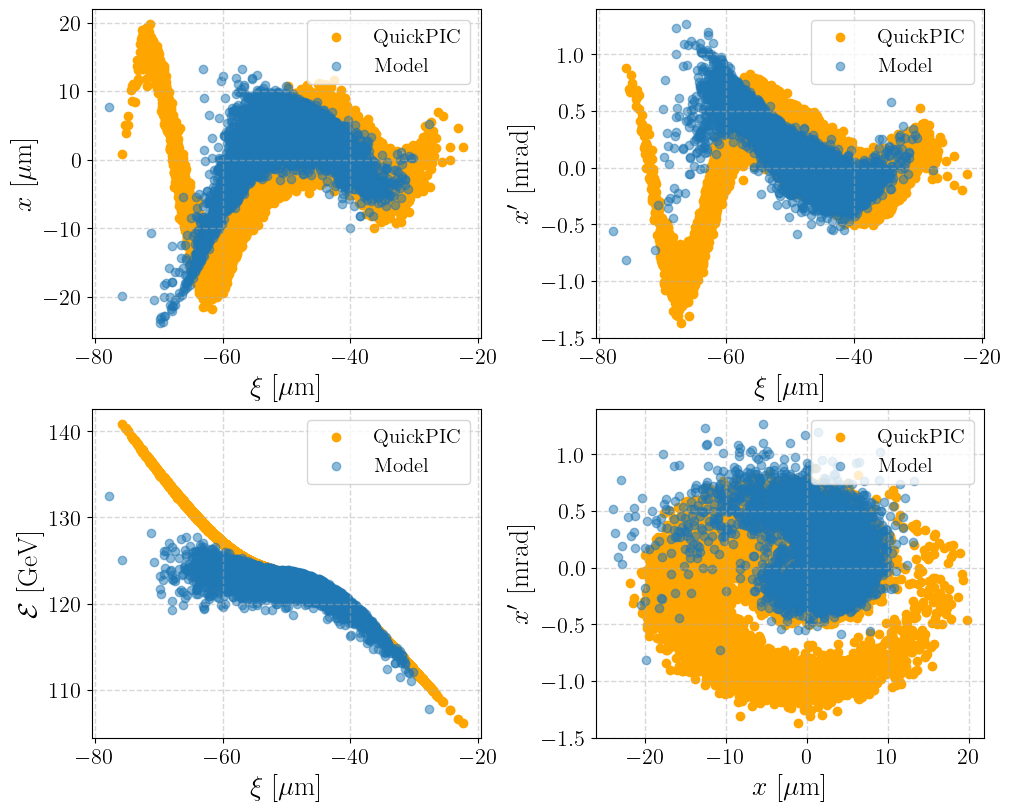

In [21]:
#extract_step = -1
#main_QP = qp[extract_step].PP[1].beam

qp_dump = qp.get_closest_qpstep(beam_out.location)
main_QP = qp_dump.PP[1].beam

# Set default Latex fonts
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

# Set default font sizes for figures
params = {
    'axes.labelsize': 20,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 15
}
pylab.rcParams.update(params)

# Labels for plots
#zlab = '$z$ [$\mathrm{\mu}$m]'
#xilab = r'$\xi$ [$\mathrm{\mu}$m]'
#slab = '$s$ [m]'
#xlab = '$x$ [$\mathrm{\mu}$m]'
#field_lab = '$E_z$ [GV/m]'
#dN_dz_lab = '$\partial N/\partial z$ [$\mathrm{m}^{-1}$]'
xps_lab = '$x\'$ [mrad]'
energ_lab = '$\mathcal{E}$ [GeV]'


# ---------- Convert grid coordinates ----------
# Scale grid coordinates such that the beam moves to the right and the beam axis is in the middle of the box.
xs_main_QP = (main_QP[:,0] - qp.offset_x0) * 1e-6  # [m]

xis_main_QP = -(main_QP[:,2] - qp.offset_z0) * 1e-6  # [m]
xps_main_QP = main_QP[:,3] * 1e-6  # [rad]
Es_main_QP = main_QP[:,5] * 1e9  # [eV]
weights_QP = qp._qp_N[1]/len(xs_main_QP) * np.ones(len(xs_main_QP))  # The weight of each macroparticle for the mein beam.

# Set up a figure with axes
fig_QP_beam, axs_QP_beam = plt.subplots(nrows=2, ncols=2, layout='constrained', figsize=(10, 4*2))

# 2D z-x distribution
#binned_data, zedges, xedges = np.histogram2d(xis_main_QP, xs_main_QP, hist_bins, hist_range, weights=weights_QP)
#beam_hist2d = binned_data.T/np.diff(zedges)/np.diff(xedges); clab = '$\partial^2 N/\partial z\partial x$ [$\mathrm{m}^{-2}$]'
##beam_hist2d = binned_data.T; clab = '$N(z,x)$'
#stage_tracked.imshow_plot(beam_hist2d, axes=axs_QP_beam[0][0], extent=extent, vmin=None, vmax=None, colmap='viridis', 
#                  xlab=xilab, ylab=xlab, clab=clab, gridOn=False, origin='lower', interpolation='nearest')
#axs_QP_beam[0][0].plot(stage.zs_main_cut*1e6, x_slices*1e6, 'r', alpha=0.5)


# 2D z-x' distribution
#binned_data, zedges, xedges = np.histogram2d(xis_main_QP, xps_main_QP, hist_bins, hist_range, weights=weights_QP)
#beam_hist2d = binned_data.T/np.diff(zedges)/np.diff(xedges); clab = '$\partial^2 N/\partial z\partial x$ [$\mathrm{m}^{-2}$]'
##beam_hist2d = binned_data.T; clab = '$N(z,x)$'
#stage_tracked.imshow_plot(beam_hist2d, axes=axs_QP_beam[0][1], extent=extent_xxp, vmin=None, vmax=None, colmap='viridis', 
#                  xlab=xilab, ylab=xlab, clab=clab, gridOn=False, origin='lower', interpolation='nearest')
#axs_QP_beam[0][1].plot(stage.zs_main_cut*1e6, xp_slices*1e3, 'r', alpha=0.5)


# 2D x-x' distribution
#binned_data, zedges, xedges = np.histogram2d(xs_main_QP, xps_main_QP, hist_bins, hist_range_xxp, weights=weights_QP)
#beam_hist2d = binned_data.T/np.diff(zedges)/np.diff(xedges); clab = '$\partial^2 N/\partial x\partial x\'$ [$\mathrm{m}^{-1}$ $\mathrm{rad}^{-1}$]'
##beam_hist2d = binned_data.T; clab = '$N(z,x)$'
#stage_tracked.imshow_plot(beam_hist2d, axs_QP_beam[1][1], extent=extent_xxp, vmin=None, vmax=None, colmap='viridis', 
#                  xlab=xlab, ylab=xps_lab, clab=clab, gridOn=False, origin='lower', interpolation='nearest')


n_th_particle = 1  # Use this to selectively plot every n_th_particle particle.
xis_main_tracked = beam_out.zs()
xs_main_tracked = beam_out.xs()
xps_main_tracked = beam_out.xps()
Es_main_tracked = beam_out.Es()

# Scatter plot of z-x phase space
axs_QP_beam[0][0].scatter(xis_main_QP[::n_th_particle]*1e6, xs_main_QP[::n_th_particle]*1e6, color='orange', label='QuickPIC')
axs_QP_beam[0][0].scatter(xis_main_tracked[::n_th_particle]*1e6, xs_main_tracked[::n_th_particle]*1e6, alpha=0.5, label='Model')
#axs_QP_beam[0][0].plot((stage_tracked.zs_main_cut)*1e6, x_slices*1e6, 'r', label='Slice mean $x$ from tracking')
axs_QP_beam[0][0].set_xlabel(xilab)
axs_QP_beam[0][0].set_ylabel(xlab)
axs_QP_beam[0][0].legend(loc='upper right')
axs_QP_beam[0][0].grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=.5)


# Scatter plot of z-x' phase space

axs_QP_beam[0][1].scatter(xis_main_QP[::n_th_particle]*1e6, xps_main_QP[::n_th_particle]*1e3, color='orange', label='QuickPIC')
axs_QP_beam[0][1].scatter(xis_main_tracked[::n_th_particle]*1e6, xps_main_tracked[::n_th_particle]*1e3, alpha=0.5, label='Model')
#axs_QP_beam[0][1].plot((stage_tracked.zs_main_cut)*1e6, xp_slices*1e3, 'r', label='Slice $x\'$ from tracking')
axs_QP_beam[0][1].set_xlabel(xilab)
axs_QP_beam[0][1].set_ylabel(xps_lab)
axs_QP_beam[0][1].legend(loc='upper right')
axs_QP_beam[0][1].grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=.5)


# Scatter plot of z-energy phase space
axs_QP_beam[1][0].scatter(xis_main_QP[::n_th_particle]*1e6, Es_main_QP[::n_th_particle]/1e9, color='orange', label='QuickPIC')
axs_QP_beam[1][0].scatter(xis_main_tracked[::n_th_particle]*1e6, Es_main_tracked[::n_th_particle]/1e9, alpha=0.5, label='Model')
#axs_QP_beam[1][0].plot((stage_tracked.zs_main_cut)*1e6, energy_slices/1e9, 'r', label='Slice $\mathcal{E}$ from tracking')
axs_QP_beam[1][0].set_xlabel(xilab)
axs_QP_beam[1][0].set_ylabel(energ_lab)
axs_QP_beam[1][0].legend(loc='upper right')
axs_QP_beam[1][0].grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=.5)

# Scatter plot of x-x' phase space
axs_QP_beam[1][1].scatter(xs_main_QP[::n_th_particle]*1e6, xps_main_QP[::n_th_particle]*1e3, color='orange', label='QuickPIC')
axs_QP_beam[1][1].scatter(xs_main_tracked[::n_th_particle]*1e6, xps_main_tracked[::n_th_particle]*1e3, alpha=0.5, label='Model')
axs_QP_beam[1][1].set_xlabel(xlab)
axs_QP_beam[1][1].set_ylabel(xps_lab)
axs_QP_beam[1][1].legend(loc='upper right')
axs_QP_beam[1][1].grid(True, which='both', axis='both', linestyle='--', linewidth=1, alpha=.5)

# Save the figure
if save_plots is True:
    if use_interstages is True:
        filename = plot_path + 'QP_scatter_plots_FACET-II_benchmark_prtclInstabilityStage' + str(stage_num) + '_interstages' + str(main.num_particles) + 'prtcls_' + str(stage_tracked.time_step_mod ) + 'dt'
    else:
        filename = plot_path + 'QP_scatter_plots_FACET-II_benchmark_prtclInstabilityStage' + str(stage_num) + '_' + str(main.num_particles) + 'prtcls_' + str(stage_tracked.time_step_mod ) + 'dt'
    plt.savefig(filename+'.png', format='png', dpi=save_fig_dpi, bbox_inches='tight', transparent=False)

#print(xis_main_QP.mean()*1e6)
#print(stage_tracked.zs_main_cut.mean()*1e6-prop_dist*1e6)
#dir(qp)

print(len(xis_main_QP))
print(len(beam_out.zs()))
print(qp_dump.s_timestep)
print(beam_out.location)

## Save the code in the settings and inputs cells to a file

In [22]:
if overwrite is True:

    import nbformat
    
    # Read the Jupyter Notebook file
    notebook_path = os.path.abspath('') + os.sep + notebook_name + '.ipynb'
    with open(notebook_path, 'r', encoding='utf-8') as notebook_file:
        notebook_content = nbformat.read(notebook_file, as_version=4)
    
    # Extract codes for the settings and definitions
    cell_number = 5  # Replace with the appropriate cell number
    cell = notebook_content['cells'][cell_number]
    if cell.cell_type == 'code':
        settings_str = ''.join(cell['source'])
        #print(code_as_string)
    
    # Extract codes defining the sources
    cell_number = 7
    cell = notebook_content['cells'][cell_number]
    if cell.cell_type == 'code':
        sources_str = ''.join(cell['source'])
    
    # Extract codes defining the linac
    cell_number = 9
    cell = notebook_content['cells'][cell_number]
    if cell.cell_type == 'code':
        linac_str = ''.join(cell['source'])
    
    code_as_string = '##############################\n' + '# Settings and definitions\n' + '##############################\n\n' + settings_str \
    + '\n\n\n\n##############################\n' + '# Define the input beams\n' + '##############################\n\n' + sources_str \
    + '\n\n\n\n##############################\n' + '# Define the linac\n' + '##############################\n\n' + linac_str
    
    # Open the file for writing and write the code
    file_path = stage_tracked.diag_path + 'inputs.py'
    with open(file_path, 'w', encoding='utf-8') as output_file:
        output_file.write(code_as_string)
    # File is automatically closed when you exit this block
    
    print(f'Code has been saved to {file_path}')

Code has been saved to run_data/FACETII_prtcl_instability_stage_tests/inputs.py
